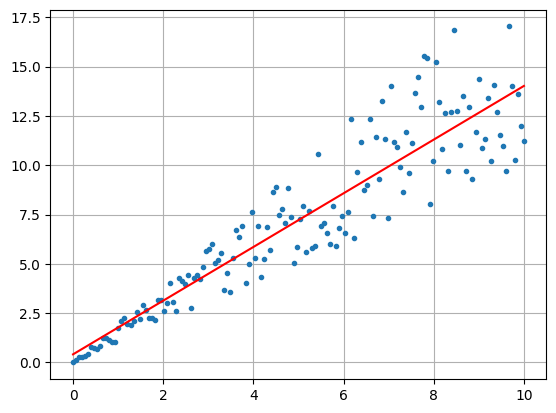

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(0,10,150)
y=x+x*np.random.random(len(x))
A=np.vstack([x,np.ones(len(x))]).T
a,b=np.linalg.lstsq(A,y,rcond=None)[0]

plt.plot(x,y,'.')
plt.plot(x,x*a+b,'r')
plt.grid(True)
plt.show()

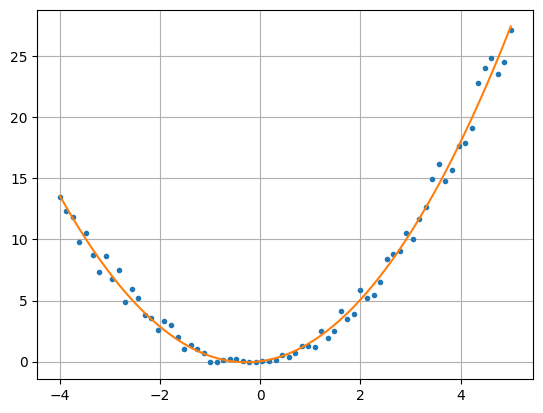

In [2]:
from scipy.optimize import curve_fit
x=np.linspace(-4,5,70)
y=x**2+x*np.random.random(len(x))

def f(x,a,b,c):
  return a*x**2+b*x+c

(a,b,c),_=curve_fit(f,x,y)
plt.plot(x,y,'.')
plt.plot(x,f(x,a,b,c))
plt.grid(True)
plt.show()

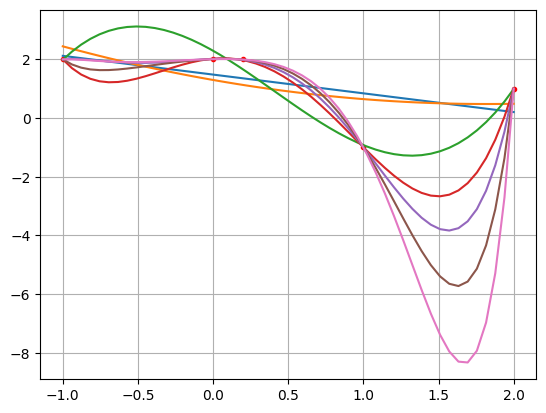

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.integrate import odeint
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge


x=np.array([-1,2,0,1,0.2])
y=np.array([2,1,2,-1,2])
data=np.vstack([x,y]).T
x=x[:,np.newaxis]
x_long=np.linspace(-1,2,50)[:,np.newaxis]
model=make_pipeline(PolynomialFeatures(1),Ridge(alpha=1e-3))
model.fit(x,y)
y_predict=model.predict(x_long)

%matplotlib inline
plt.plot(x,y,'r.')
for p in [1,2,3,4,5,6,7]:
  model=make_pipeline(PolynomialFeatures(p),Ridge(alpha=1e-3))
  model.fit(x,y)
  y_predict=model.predict(x_long)
  plt.plot(x_long,y_predict,label=str(p))
plt.grid(True)
plt.show()